<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# Importar dependencias necesarias

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import os

# Cargar y combinar conjuntos de datos

In [4]:
white_wine = pd.read_csv('D:/Python/3. Nivel III/2/datos/winequality-white.csv', sep=';')
red_wine = pd.read_csv('D:/Python/3. Nivel III/2/datos/winequality-red.csv', sep=';')

red_wine['wine_type'] = 'red'   # add a column for the type
white_wine['wine_type'] = 'white'
wines = pd.concat([red_wine, white_wine])
wines['quality_label'] = wines['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

Las reglas utilizadas para asignar la calidad a la etiqueta de calidad se describen a continuación.

• Los puntajes de calidad del vino de 3, 4 y 5 se asignan a vinos de baja calidad bajo el atributo quality_label.

• Las puntuaciones de calidad del vino de 6 y 7 se asignan a vinos de calidad media bajo el atributo quality_label.

• Los puntajes de calidad del vino de 8 y 9 se asignan a vinos de alta calidad bajo el atributo quality_label.

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [6]:
len(wines)

6497

# Prediciendo la calidad del vino

## Preparar conjuntos de datos de entrenamiento y testeo

In [7]:
wqp_features = wines.iloc[:,:-3]
wqp_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5


In [10]:
wqp_class_labels = np.array(wines['quality_label'])
wqp_class_labels


array(['high', 'low', 'medium', ..., 'low', 'low', 'low'], dtype=object)

In [9]:
wqp_label_names = ['low', 'medium', 'high'] #objeto tipo lista donde se guarden las etiquetas
#del target
wqp_label_names

['low', 'medium', 'high']

In [11]:
wqp_feature_names = list(wqp_features.columns)
wqp_feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [12]:
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features, #valores de los predictores
                                                                    wqp_class_labels, #valores del target
                                                                    test_size=0.3, #proporción de los datos de testeo
                                                                    random_state=42) #semilla

In [14]:
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Caracteristicas:', wqp_feature_names)

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Caracteristicas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Escalado de características

In [13]:
# Definir la escala
wqp_ss = StandardScaler().fit(wqp_train_X)
#fit() aplicar a los datos de entrenamientgo

# Escalar la data de entrenamiento
wqp_train_SX = wqp_ss.transform(wqp_train_X)
#transform() aplicar a los datos de entrenamiento

# Escalar la data de testeo
wqp_test_SX = wqp_ss.transform(wqp_test_X)
#transform() aplicar a los datos de testeo

## Entrenar,Predecir & Evaluar modelo usando el árbol de decisión

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
wqp_dt = DecisionTreeClassifier(criterion='entropy', #métrica de impureza
                                min_samples_split=400, #mínimo número de observaciones en el nodo
                                max_depth = 4, #profundidad máxima del árbol
                                random_state=99) #semilla
#guardamos la función en el objeto wqp_dt

#### Validación cruzada

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(wqp_dt, #modelo
                         wqp_train_SX, #valores de predictores de entrenamiento escalado 
                         wqp_train_y,# valores del target
                         scoring="accuracy", #métrica con la cual se evaluará a las multiples muestras del modelo
                         cv=30) #número de particiones de los datos

In [17]:
scores

array([0.73202614, 0.67320261, 0.65359477, 0.70588235, 0.70588235,
       0.70588235, 0.71895425, 0.73684211, 0.73026316, 0.63157895,
       0.70394737, 0.69736842, 0.71710526, 0.70394737, 0.71710526,
       0.67105263, 0.69536424, 0.7615894 , 0.69536424, 0.66225166,
       0.71523179, 0.74172185, 0.67549669, 0.72847682, 0.72      ,
       0.65333333, 0.68666667, 0.68      , 0.72      , 0.76666667])

In [18]:
scores.mean() #accuracy

0.7035599572775161

#### Elaboración del modelo

In [19]:
wqp_dt.fit(wqp_train_SX, #valores de los predictores de entrenamiento escalado
           wqp_train_y) #valores del target

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [20]:
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX) #predict()
#wqo_dt_predictions: valores predichos de los datos de testeo

In [21]:
#display_model_performance_metrics(true_labels=wqp_test_y, predicted_labels=wqp_dt_predictions, classes=wqp_label_names)
meu.display_model_performance_metrics(true_labels=wqp_test_y, #etiqueta
                                      predicted_labels=wqp_dt_predictions, #etiqueta de los valores predichos
                                      classes=wqp_label_names) #etiquetas de los predictores

Model Performance metrics:
------------------------------
Accuracy: 0.7144
Precision: 0.6911
Recall: 0.7144
F1 Score: 0.7

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.67      0.58      0.63       718
      medium       0.73      0.83      0.78      1178
        high       0.00      0.00      0.00        54

    accuracy                           0.71      1950
   macro avg       0.47      0.47      0.47      1950
weighted avg       0.69      0.71      0.70      1950


Prediction Confusion Matrix:
------------------------------
        low  medium  high
low     420     298     0
medium  205     973     0
high      0      54     0


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Ver las características importantes del modelo de árbol de decisión

In [22]:
wqp_dt_feature_importances = wqp_dt.feature_importances_ #feature_importances_ extrae los valores de los
#predictores importantes
wqp_dt_feature_importances

array([0.        , 0.21298156, 0.        , 0.02728381, 0.        ,
       0.0664742 , 0.        , 0.01809345, 0.        , 0.02979841,
       0.64536857])

In [23]:

wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))

In [24]:
wqp_dt_feature_names

('fixed acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'pH',
 'density',
 'residual sugar',
 'sulphates',
 'free sulfur dioxide',
 'volatile acidity',
 'alcohol')

In [25]:
wqp_dt_feature_scores

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.018093451940456445,
 0.027283810295966993,
 0.029798411602021235,
 0.06647419940865004,
 0.21298155628295007,
 0.6453685704699552)

In [26]:
y_position = list(range(len(wqp_dt_feature_names)))
y_position

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

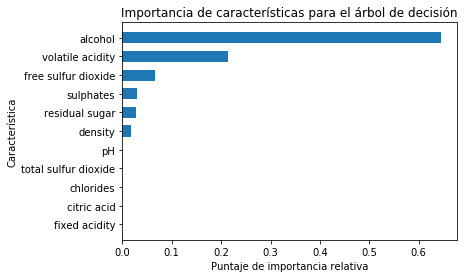

In [27]:
plt.barh(y_position, 
         wqp_dt_feature_scores, 
         height=0.6, 
         align='center')
plt.yticks(y_position , 
           wqp_dt_feature_names)
plt.xlabel('Puntaje de importancia relativa')
plt.ylabel('Característica')
t = plt.title('Importancia de características para el árbol de decisión')

## Visualiza el árbol de decisión

In [34]:
#conda install python-graphviz
#conda install pydot
#pip install graphviz

In [28]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

In [29]:
graph = Source(tree.export_graphviz(wqp_dt, out_file=None, class_names=wqp_label_names,
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=wqp_feature_names, max_depth=3))
png_data = graph.pipe(format='png')

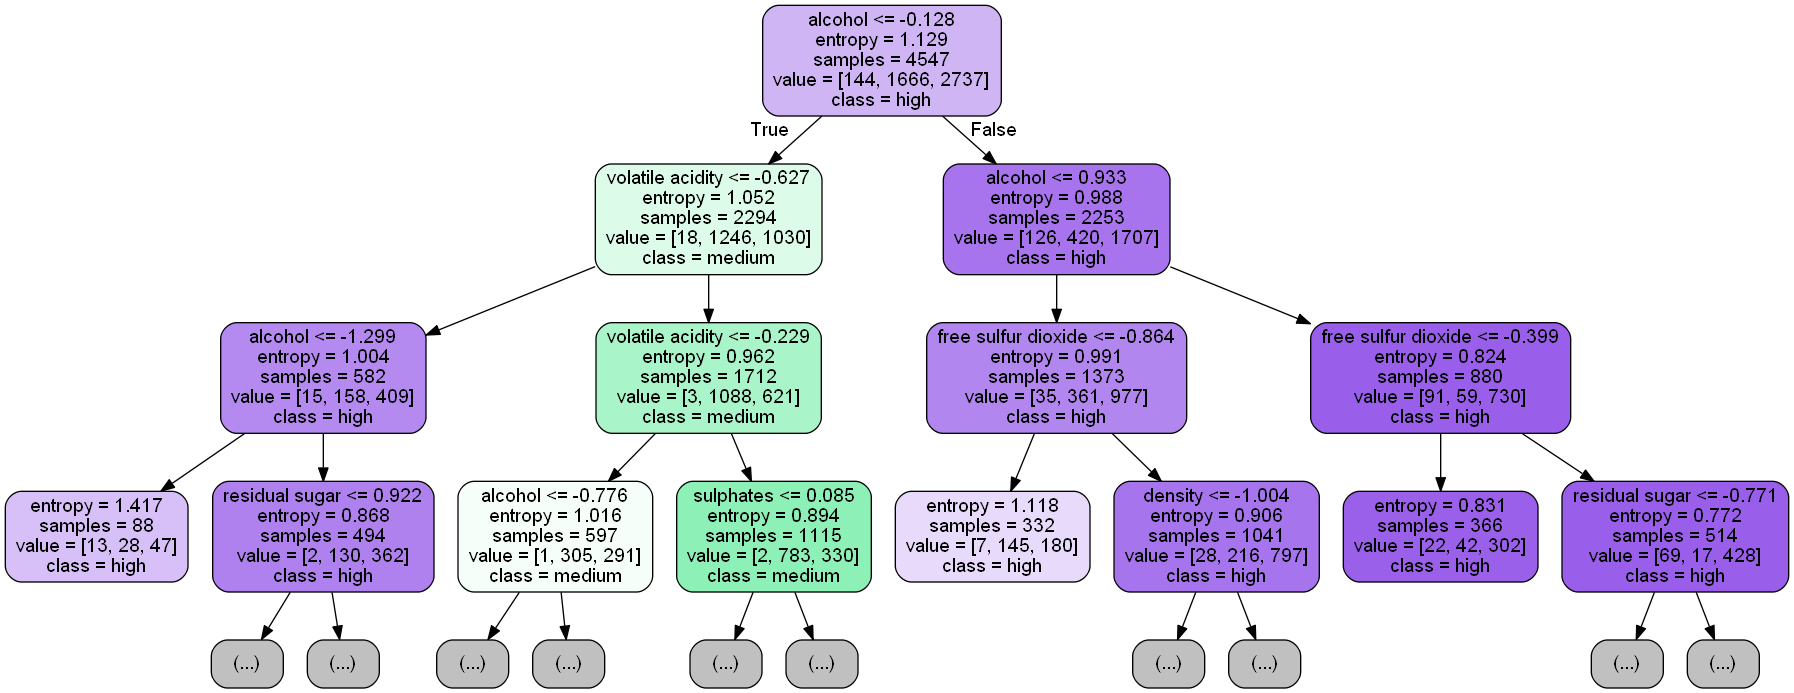

In [30]:
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)

## Entrenamiento, Predecir & Evaluar modelo usando Random Forest

In [31]:
import os

In [17]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# entrenar el modelo
wqp_rf = RandomForestClassifier(random_state=0)#este objeto es de tipo función
wqp_rf.fit(wqp_train_SX, wqp_train_y)

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
# predecir y evaluar el desempeño
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX) #función predict() para estimar los valores predichos de los dqtos
#de testeo
meu.display_model_performance_metrics(true_labels=wqp_test_y, predicted_labels=wqp_rf_predictions, 
                                      classes=wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7867
Precision: 0.7851
Recall: 0.7867
F1 Score: 0.7839

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.73      0.75      0.74       718
      medium       0.82      0.83      0.83      1178
        high       0.67      0.30      0.41        54

    accuracy                           0.79      1950
   macro avg       0.74      0.63      0.66      1950
weighted avg       0.79      0.79      0.78      1950


Prediction Confusion Matrix:
------------------------------
        low  medium  high
low     540     178     0
medium  192     978     8
high      4      34    16


## Ajuste de hiperparámetros con búsqueda de cuadrícula y validación cruzada

In [21]:
print(wqp_rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


### Obtenga los mejores valores de hiperparámetro

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

wqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), #función de modelo 
                       param_grid, cv=10, #cv sugerido es = 10
                       scoring='accuracy')
wqp_clf.fit(wqp_train_SX, #x de entrenamiento 
            wqp_train_y) #y de entrenamiento
print(wqp_clf.best_params_) #best_params_

{'max_features': 'auto', 'n_estimators': 500}


### Ver resultados de búsqueda de cuadrícula

In [38]:
results = wqp_clf.cv_results_ #resulatos de la validación cruzada
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.8018 0.0103
{'max_features': 'auto', 'n_estimators': 200} 0.801 0.0146
{'max_features': 'auto', 'n_estimators': 300} 0.8012 0.0123
{'max_features': 'auto', 'n_estimators': 500} 0.8021 0.0145
{'max_features': None, 'n_estimators': 100} 0.7924 0.0188
{'max_features': None, 'n_estimators': 200} 0.7935 0.0179
{'max_features': None, 'n_estimators': 300} 0.7926 0.0183
{'max_features': None, 'n_estimators': 500} 0.7939 0.0168
{'max_features': 'log2', 'n_estimators': 100} 0.8018 0.0103
{'max_features': 'log2', 'n_estimators': 200} 0.801 0.0146
{'max_features': 'log2', 'n_estimators': 300} 0.8012 0.0123
{'max_features': 'log2', 'n_estimators': 500} 0.8021 0.0145


In [44]:
import math as m
round(m.log2(11),0)

3.0

In [45]:
round(m.sqrt(11),0)

3.0

## Entrenamiento, Predecir & Evaluar Modelo Bosque aleatorios con  hiperparámetros sintonizados

In [46]:
wqp_rf = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=42)

In [47]:
wqp_rf.fit(wqp_train_SX, wqp_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

In [49]:
meu.display_model_performance_metrics(true_labels=wqp_test_y, predicted_labels=wqp_rf_predictions, 
                                      classes=wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.8077
Precision: 0.8095
Recall: 0.8077
F1 Score: 0.8019

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.80      0.72      0.75       718
      medium       0.81      0.89      0.85      1178
        high       0.94      0.28      0.43        54

    accuracy                           0.81      1950
   macro avg       0.85      0.63      0.68      1950
weighted avg       0.81      0.81      0.80      1950


Prediction Confusion Matrix:
------------------------------
        low  medium  high
low     514     204     0
medium  131    1046     1
high      1      38    15
